In [1]:
! pip install -U langgraph langchain-openai tavily-python langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.0/383.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49

In [2]:
import os
from langchain_openai import ChatOpenAI
from typing import Literal
from langchain_core.tools import tool
from IPython.display import Image, display
from langgraph.prebuilt import ToolNode
from langgraph.graph import StateGraph, MessagesState
from langchain_community.tools.tavily_search import TavilySearchResults

In [3]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "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"
# LangSmith 项目名称，默认 default
os.environ["LANGCHAIN_PROJECT"] = "default"
# Tavily API Key
os.environ["TAVILY_API_KEY"] = "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"

In [4]:
def call_model(state: MessagesState):
    messages = state["messages"]
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}

def should_continue(state: MessagesState) -> Literal["tools", "__end__"]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return "__end__"

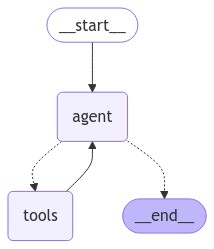

In [5]:
tools = [TavilySearchResults(max_results=1)]
model_with_tools = ChatOpenAI(model="gpt-4o", temperature=0,
    api_key="sk-T6SlqfUnyFytejvA3c1584F87d6343878232185e26243b1d",
    base_url="https://api.apiyi.com/v1"
          ).bind_tools(tools)
tool_node = ToolNode(tools)
workflow = StateGraph(MessagesState)
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)
workflow.add_edge("__start__", "agent")
workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", "agent")
app = workflow.compile()
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [7]:
for chunk in app.stream(
    {"messages": [("human", "2024年西安程序员平均薪酬")]}, stream_mode="values"
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

2024年西安程序员平均薪酬
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_KcxFNEjKRC1SYLWvDcKdp9Iy)
 Call ID: call_KcxFNEjKRC1SYLWvDcKdp9Iy
  Args:
    query: 2024年西安程序员平均薪酬
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.jobui.com/salary/xian-chengxuyuan/", "content": "市场需求：2024年招聘职位83个，占西安0.038%。 ... 对比西安平均工资 ￥10.2k，低 0.4% ，数据可信度高。 ... 西安程序员工资收入多少钱一个月？招聘待遇怎么样？据统计，西安程序员47.5%的岗位拿6-10k，取自588份样本。"}]
================================== Ai Message ==================================

根据最新数据，2024年西安程序员的平均薪酬约为10,200元人民币每月。大约47.5%的程序员岗位薪资在6,000到10,000元之间。
